In [342]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
path = os.getcwd()

In [611]:
itrain = pd.read_csv(str(path)+'/train.csv')
itest = pd.read_csv(str(path)+'/test.csv')

In [612]:
print(itrain.shape)
itest.shape

(330045, 7)


(141448, 6)

In [613]:
itrain.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


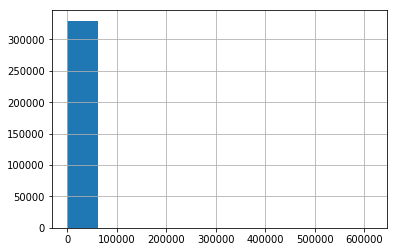

In [614]:
itrain['Upvotes'].hist()

In [615]:
itrain.apply(lambda x:(len(x.unique()), [x.unique()]))

ID            (330045, [[52664, 327662, 468453, 96996, 13146...
Tag                      (10, [[a, c, r, j, p, s, h, o, i, x]])
Reputation    (16527, [[3942.0, 26046.0, 1358.0, 264.0, 4271...
Answers       (63, [[2.0, 12.0, 4.0, 3.0, 1.0, 7.0, 8.0, 0.0...
Username      (141802, [[155623, 21781, 56177, 168793, 11222...
Views         (82137, [[7855.0, 55801.0, 8067.0, 27064.0, 13...
Upvotes       (7239, [[42.0, 1175.0, 60.0, 9.0, 83.0, 4.0, 1...
dtype: object

In [8]:
itrain.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

### test-train - merge

In [647]:
split_len = len(itrain)
train_len = len(itrain)
test_len = len(itest)

itrain_notarget = itrain.drop('Upvotes', axis = 1)
itrain_test = pd.concat([itrain_notarget, itest], axis=0)

In [652]:
itrain_test['Answers'].replace({0:3}, inplace = True)

In [653]:
itrain_test.describe()

,ID,Reputation,Answers,Username,Views
count,471493.000000,4.714930e+05,471493.000000,471493.000000,4.714930e+05
mean,235747.000000,7.817481e+03,3.935653,81414.491477,2.970545e+04
std,136108.449573,2.731903e+04,3.566113,49164.428081,8.077310e+04
min,1.000000,0.000000e+00,1.000000,0.000000,9.000000e+00
25%,117874.000000,2.830000e+02,2.000000,39948.000000,2.599000e+03
50%,235747.000000,1.238000e+03,3.000000,78891.000000,8.961000e+03
75%,353620.000000,5.120000e+03,5.000000,122455.000000,2.689900e+04
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06


In [731]:
itrain_test['Avg_Views_byTag'] = itrain_test[['Views','Tag']].groupby(['Tag']).transform('mean')
itrain_test['Avg_Ans_byTag'] = itrain_test[['Answers','Tag']].groupby(['Tag']).transform('mean')
itrain_test['AvgRept_byUser'] = itrain_test[['Reputation','Username']].groupby(['Username']).transform('mean')

### Feature Selection

In [733]:
num_col = ['Reputation', 'Answers', 'Views']
cat_col = ['Avg_Views_byTag','Avg_Ans_byTag','AvgRept_byUser' ]
num_df = itrain_test[num_col]
cat_df = itrain_test[cat_col]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37435b1550>,
      dtype=object)

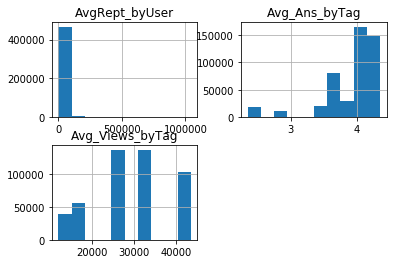

In [734]:
cat_df.hist()

### New Features - Quantiles for numerical

In [736]:
percentile_list = np.arange(0, 1.00, 0.00001)

quantiles = num_df['Reputation'].quantile(percentile_list)
#print(quantiles)

num_df['Reput_Rank'] = pd.qcut(num_df['Reputation'], q = percentile_list, labels = False, duplicates='drop')

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [737]:
len(num_df['Reput_Rank'].unique())

14145

In [401]:
# percentile_list1 = np.arange(0, 1.00, 0.01)

# # For Answers
# quantiles = num_df['Answers'].quantile(percentile_list)
# num_df['Answers_Qlabel'] = pd.qcut(num_df['Answers'], q = percentile_list1, duplicates='drop',labels = False)

# # For Views
# percentile_labels2 = np.arange(1,101, 1)
# num_df['Views_Qlabel'] = pd.qcut(num_df['Views'], q = percentile_list, labels = percentile_labels2, duplicates='drop')

### Feature Transformation - target Box Cox

In [805]:
tar = itrain[['Upvotes']]
tar['pos_Upvotes'] = tar['Upvotes'] + 1

upv = np.array(tar['pos_Upvotes'])
l, lambda_target = spstats.boxcox(upv)
print(lambda_target)

## Box cox 
from scipy.special import boxcox, inv_boxcox
tar['Upvotes_bx'] = boxcox(tar['pos_Upvotes'], lambda_target)
tar['Upvotes_invbx'] = inv_boxcox(tar['Upvotes_bx'], lambda_target)

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


-0.10725828164501784


/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


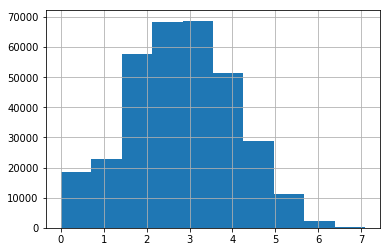

In [640]:
tar['Upvotes_bx'].hist()

### BOX COX Transformation: Numeric variables

In [403]:
# ## Log tranformations
# num_df['Answers_log'] = np.log((1+ num_df['Answers']))
# num_df['Views_log'] = np.log((1+ num_df['Views']))
# num_df['Rept_log'] = np.log((1+ num_df['Reputation']))
# num_df['Ans2Views_log'] = np.log((1+ num_df['Ans2Views']))

In [740]:
### new +ve feature for the Box Cox Transforms
# answers_clean = answers[~np.isnan(answers)]

answers = np.array(num_df['Answers'])
l, opt_lambda1 = spstats.boxcox(answers)

views = np.array(num_df['Views'])
l, opt_lambda2 = spstats.boxcox(views)

rept = np.array(num_df['Reputation'] + 1)
l, opt_lambda3 = spstats.boxcox(rept)


print(opt_lambda1,opt_lambda2,opt_lambda3)

### After BoxCox Transforms

from scipy import stats as spstats
num_df['Ans_BClambda_opt'] = spstats.boxcox(num_df['Answers'], lmbda=opt_lambda1)
num_df['Views_BClambda_opt'] = spstats.boxcox(num_df['Views'], lmbda=opt_lambda2)
num_df['Rept_BClambda_opt'] = spstats.boxcox(num_df['Reputation'] + 1, lmbda=opt_lambda3)


-0.12621369655934 0.06670108648461379 0.07099454781641329


/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373dfd7d68>,
      dtype=object)

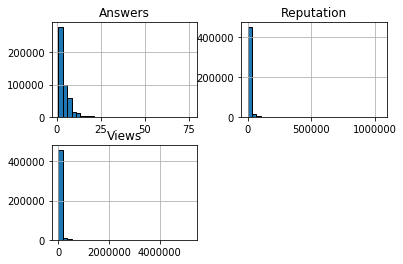

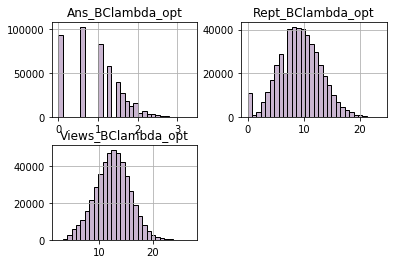

In [741]:
num_df[['Answers','Views', 'Reputation']].hist(bins = 30, edgecolor = 'black')
#num_df[['Answers_log', 'Views_log','Rept_log', 'Ans2Views_log']].hist(
   # bins = 25,color='#B9C5A0', edgecolor='black')
num_df[['Ans_BClambda_opt', 'Views_BClambda_opt','Rept_BClambda_opt']].hist(
    bins = 30,color='#C9B5D0', edgecolor='black')

### Feature Interaction - numerical

In [922]:
### new interaction features:
new_df = num_df[['Answers', 'Views', 'Reputation']]

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
res = pf.fit_transform(new_df)

degree_df = pd.DataFrame(pf.powers_, columns=['Ans_degree', 'View_degree', 'Rept_degree'])

col = np.arange(1,20,1)
int_features = pd.DataFrame(data = res, columns = col)

#8 =  view * rept
#17 = view^2 * rept

pn =  int_features[[8]]

In [923]:
degree_df

,Ans_degree,View_degree,Rept_degree
0,1,0,0
1,0,1,0
2,0,0,1
3,2,0,0
4,1,1,0
5,1,0,1
6,0,2,0
7,0,1,1
8,0,0,2
9,3,0,0


### feature Transformation -  categorical

In [578]:
# cat_df = itrain[cat_col]

# ### feature hashing 

# from sklearn.feature_extraction import FeatureHasher
# fh = FeatureHasher(n_features = 1, input_type='string')
# cat_df['User_label'] = cat_df['User_label'].astype(str)
# hashed_feat = fh.fit_transform(cat_df['User_label'])

# hashed_Username = hashed_feat.toarray()
# #cat_df['hashed_Username'] = hashed_Username

# cat_df1 = pd.concat([new_cat_df, pd.DataFrame(hashed_Username, columns = ['hashed_userid'])], axis=1)

In [433]:
### feature hashing 
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features = 3, input_type='string')
hashed_feat = fh.fit_transform(cat_df['Tag'])
hashed_Tag = hashed_feat.toarray()
#cat_df['hashed_Tag'] = hashed_Tag

cat_df1 = pd.concat([cat_df, pd.DataFrame(hashed_Tag,  columns = ['hash_tag1', 'hash_tag2','hash_tag3' ])], axis=1)

In [579]:
cat_df1.apply(lambda x:(len(x.unique()), [x.unique()]))

Username         (141802, [[155623, 21781, 56177, 168793, 11222...
Tag                         (10, [[a, c, r, j, p, s, h, o, i, x]])
User_label       (141802, [[126204, 17767, 45829, 136234, 91207...
hash_tag1                                       (2, [[0.0, -1.0]])
hash_tag2                                  (3, [[0.0, 1.0, -1.0]])
hash_tag3                                  (3, [[1.0, -1.0, 0.0]])
hashed_userid    (12, [[0.0, 3.0, 1.0, 2.0, -1.0, -2.0, 5.0, 4....
dtype: object

In [744]:
num_df = num_df.drop(, axis = 1)

### Test Train - Split

,Reputation,Answers,Views,Reput_Rank,Ans_BClambda_opt,Views_BClambda_opt,Rept_BClambda_opt,Avg_Views_byTag,Avg_Ans_byTag,AvgRept_byUser
0,3942.0,2.0,7855.0,4751,0.663692,12.277266,11.269148,32155.024683,4.286567,3942.000000
1,26046.0,12.0,55801.0,13751,2.132970,16.087186,14.905847,32155.024683,4.286567,26046.000000
2,1358.0,4.0,8067.0,1631,1.271789,12.325749,9.422456,26946.857135,4.074178,1358.000000
3,264.0,3.0,27064.0,309,1.025847,14.622789,6.846485,32155.024683,4.286567,264.000000
4,4271.0,4.0,13986.0,5121,1.271789,13.347056,11.413815,26946.857135,4.074178,4271.000000
5,440.0,1.0,5577.0,521,0.000000,11.661353,7.617209,12115.693270,2.347846,1746.636364
6,147.0,1.0,17184.0,171,0.000000,13.738988,5.998482,26946.857135,4.074178,2251.750000
7,2269.0,2.0,312.0,2741,0.663692,6.997978,10.294458,43398.736246,4.350397,2269.000000
8,111.0,2.0,53738.0,126,0.663692,16.009190,5.604982,43398.736246,4.350397,111.000000
9,2749.0,1.0,227.0,3332,0.000000,6.536380,10.628743,26946.857135,4.074178,2446.666667


In [850]:
train_test_df = pd.concat([num_df, cat_df], axis = 1)

In [924]:
train_test_df['VxR'] = int_features[8]
train_test_df['Ans2'] = int_features[3]

In [925]:
df_train = train_test_df[:split_len]
df_test = train_test_df[split_len:]

In [895]:
train = df_train.drop(['Reputation', 'Answers', 'Views', 'Views_BClambda_opt', 'Rept_BClambda_opt','Ans_BClambda_opt'], axis = 1)
test = df_test.drop(['Reputation', 'Answers', 'Views','Views_BClambda_opt', 'Rept_BClambda_opt'], axis = 1)

In [440]:
df1 = num_df[['Ans_BClambda_opt','Views_BClambda_opt', 'Rept_BClambda_opt', 'Ans2Views_opt']]
df2 = cat_df1.drop(['Tag', 'Username',], axis = 1)

In [834]:
## Feature Selection
predictors = pd.concat([df, pn], axis = 1)
target = itrain['Upvotes']t
test_set = pd.concat([df, pn], axis = 1)

In [691]:
# #Dummies
#df = pd.get_dummies(df, columns = ['Tag'])
#test = pd.get_dummies(test_set)

In [896]:
train.head()

,Reput_Rank,Avg_Views_byTag,Avg_Ans_byTag,AvgRept_byUser,VxR,Ans2
0,4751,32155.024683,4.286567,3942.0,138.354318,11.269148
1,13751,32155.024683,4.286567,26046.0,239.793142,14.905847
2,1631,26946.857135,4.074178,1358.0,116.138820,9.422456
3,309,32155.024683,4.286567,264.0,100.114702,6.846485
4,5121,26946.857135,4.074178,4271.0,152.340827,11.413815


In [812]:
display(df.head())

,Reput_Rank,Views_BClambda_opt,Rept_BClambda_opt,Avg_Views_byTag,Avg_Ans_byTag,AvgRept_byUser
0,4751,12.277266,11.269148,6,8,8635
1,13751,16.087186,14.905847,6,8,18021
2,1631,12.325749,9.422456,5,7,4327
3,309,14.622789,6.846485,6,8,1004
4,5121,13.347056,11.413815,5,7,9063


### Standardizing & PCA

In [848]:
# ### Standarization:
# from sklearn.preprocessing import StandardScaler
# # Standardizing the features

# sc = StandardScaler()
# train_std  = sc.fit_transform(df)
# #test_std = sc.transform(test_imputed)

# ## PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 5)
# principalComponents = pca.fit_transform(train_std)
# #test_pc = pca.transform(test_std)
# pdf = pd.DataFrame(data = principalComponents)
# #pdf_test = pd.DataFrame(data = test_pc)


# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_

# #Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# plt.plot(var1)
# plt.xlabel('principal components(i)')
# plt.ylabel('%')
# plt.title('Cummlative Variance with pc')

In [767]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# # LDA
# sklearn_lda = LDA(n_components = 4)
# lda = sklearn_lda.fit_transform(df, target)
# lda_df = pd.DataFrame(data = lda)

In [808]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Username_labels = le.fit_transform(df['Avg_Views_byTag'])
df['Avg_Views_byTag'] = Username_labels

Username_labels = le.fit_transform(df['Avg_Ans_byTag'])
df['Avg_Ans_byTag'] = Username_labels

#Username_labels = le.fit_transform(df['AvgRept_byUser'])
#df['AvgRept_byUser'] = Username_labels

In [772]:
# ## tSNE
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, verbose=1, perplexity = 10, n_iter = 250)
# tsne_res = tsne.fit_transform(df)

In [926]:
df_train.head()

,Reputation,Answers,Views,Reput_Rank,Ans_BClambda_opt,Views_BClambda_opt,Rept_BClambda_opt,Avg_Views_byTag,Avg_Ans_byTag,AvgRept_byUser,VxR,Ans2
0,3942.0,2.0,7855.0,4751,0.663692,12.277266,11.269148,32155.024683,4.286567,3942.0,3.096441e+07,3942.0
1,26046.0,12.0,55801.0,13751,2.132970,16.087186,14.905847,32155.024683,4.286567,26046.0,1.453393e+09,26046.0
2,1358.0,4.0,8067.0,1631,1.271789,12.325749,9.422456,26946.857135,4.074178,1358.0,1.095499e+07,1358.0
3,264.0,3.0,27064.0,309,1.025847,14.622789,6.846485,32155.024683,4.286567,264.0,7.144896e+06,264.0
4,4271.0,4.0,13986.0,5121,1.271789,13.347056,11.413815,26946.857135,4.074178,4271.0,5.973421e+07,4271.0


### Train - Test Split

In [876]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from math import sqrt
estimator = xgb.XGBRegressor(n_estimators = 100, n_jobs = -1)
predicted = cross_val_predict(estimator, train, target, cv=5)
sqrt(mean_squared_error(target, predicted)) #RMSE

1203.7024085882613

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Optimal number of features : 6


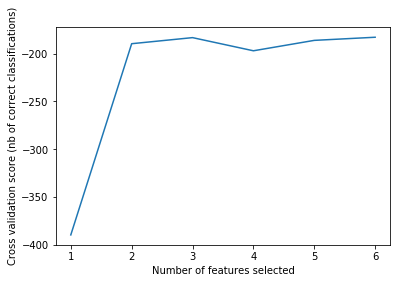

array([1, 1, 1, 1, 1, 1])

In [787]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

estimator = xgb.XGBRegressor(n_estimators = 100, n_jobs = -1)
selector = RFECV(estimator, step = 1, cv=StratifiedKFold(2),
              scoring= 'neg_mean_absolute_error' )
selector = selector.fit(df, target)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

selector.ranking_

In [890]:
new_pred = int_features[:split_len]
pred = new_pred[[3,8]]
#p = predictors[[8, 17]]

In [932]:
#importing packages from sk learn

from sklearn.model_selection import train_test_split


#FUNCTION for Train & Validation set
X_train, X_test, y_train, y_test = train_test_split(df_train[['Reputation', 'Answers', 'Views']], 
                                                    target, test_size=0.3, random_state = 52)

In [933]:
#Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

### Functions

In [385]:
def featureImp(model):
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    fImp_Asc = []
    
    for i in indices:
        n = features[i]
        fImp_Asc.append(n)
        
    plt.figure(figsize=(5,5))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importances')
    plt.show()
    
    #return fImp_Asc
    
    
def BuildModel(model):
    
    clf = model.fit(X_train, y_train)
    
    #train-prediction
    y_train_pred = Classifier.predict(X_train)
    
    #train score
    from sklearn.metrics import classification_report
    Clf_report_train = classification_report(y_train, y_train_pred)
    print('\n Clf Report on train: \n\n', Clf_report_train)
    
    #accuracy on train
    accuracy = Classifier.score(X_train, y_train)
    print('\n Accuarcy on train %:  ', accuracy * 100)

    
    
    #prediction on validation set
    y_pred = train_model.predict(X_test)
    print(y_pred)
    
    #residuals
    residuals = y_test - y_pred
    #print("residuals:", residuals)
    
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Root Mean squared error on test: %.2f" % sqrt(mse))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score on test: %.2f' % r2_score(y_test, y_pred))

### Model Building

In [670]:
# #### Blank Model ----------------------------!!!
# array([5, 2, 4, 5, 3, 2, 4, 1, 4, 5, 3, 3, 3, 2, 2, 5, 1, 1, 4])

# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics

# rfr = RandomForestRegressor(n_estimators = 1000, n_jobs =-1)
# BuildModel(rfr)
# featureImp(rfr)

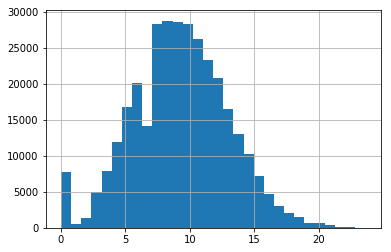

In [908]:
train['Ans2'].hist(bins = 30)

In [1]:
#### Blank Model ----------------------------!!!

import xgboost as xgb
from sklearn import metrics

xgr = xgb.XGBRegressor(n_estimators = 100, n_jobs = -1)
BuildModel(xgr)
featureImp(xgr)

ModuleNotFoundError: No module named 'xgboost'

#### Xgb Early stopping

[0]	validation_0-rmse:2.50724	validation_1-rmse:2.50804
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[20]	validation_0-rmse:1.08051	validation_1-rmse:1.08293
[40]	validation_0-rmse:0.667106	validation_1-rmse:0.670756
[60]	validation_0-rmse:0.576326	validation_1-rmse:0.580155
[80]	validation_0-rmse:0.557989	validation_1-rmse:0.561917
[100]	validation_0-rmse:0.55346	validation_1-rmse:0.55745
[120]	validation_0-rmse:0.551877	validation_1-rmse:0.555911
[140]	validation_0-rmse:0.550996	validation_1-rmse:0.555103
[160]	validation_0-rmse:0.55048	validation_1-rmse:0.554704
[180]	validation_0-rmse:0.550123	validation_1-rmse:0.554442
[200]	validation_0-rmse:0.549909	validation_1-rmse:0.554312
[220]	validation_0-rmse:0.54967	validation_1-rmse:0.554174
[240]	validation_0-rmse:0.549485	validation_1-rmse:0.554066
[260]	validation_0-rmse:0.549385	validation_1-rmse:0.554006
[280]	validati

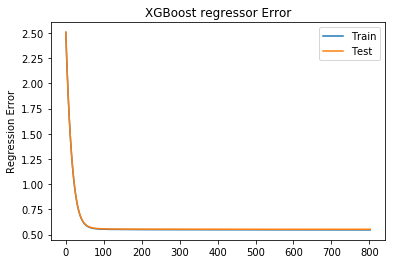

In [919]:
import xgboost as xgb
from sklearn import metrics

xgr2 = xgb.XGBRegressor(n_estimators = 1000, booster = 'gbtree', learning_rate = 0.05, n_jobs = -1) # n_estimators = 50 (default) 
# base_estimator = DecisionTreeClassifier(default)

eval_set = [(X_train, y_train), (X_test, y_test)]
xgr2.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="rmse", eval_set=eval_set, verbose = 20)

# retrieve performance metrics
results = xgr2.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('Regression Error')
plt.title('XGBoost regressor Error')
plt.show()

### Final Submission Model

In [845]:
# ### Submisssion: RF

# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics

# rfr = RandomForestRegressor(criterion='mae', n_jobs =-1)
# rfr_fit = rfr.fit(predictors_imputed, target)
# rfr_predictions = rfr.predict(test_imputed)

# isubmission['total_cases'] = rfr_predictions.round()
# isubmission['total_cases'] = isubmission['total_cases'].astype(int)
# isubmission.to_csv('01Sub_rfr.csv', index = False)


### Submission 1,2 : XGB
##submissions 3 : with only 2 intr features & Tags

import xgboost as xgb

xgr = xgb.XGBRegressor(n_estimators = 500, learning_rate = 0.01)
xgr_fit = xgr.fit(train, target)
xgr_predictions = xgr.predict(test)

isubmission = itest[['ID']]
isubmission['Upvotes'] = xgr_predictions

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [842]:
#isubmission['Upvotes'] = inv_boxcox(isubmission['Upvotes_bx'], lambda_target)

In [843]:
s = inv_boxcox(0.73, lambda_target)

In [ ]:
isubmission['Upvotes'] = abs(xgr_predictions)

In [846]:
isubmission['Upvotes'] = isubmission['Upvotes'].round()
isubmission['Upvotes'] = isubmission['Upvotes'].astype(int)
#submission = isubmission.drop(['Upvotes_bx'], axis = 1)
isubmission.to_csv('04sub_xge_nrml.csv', index = False)

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [847]:
display(isubmission.head())
print(isubmission.min())
print(isubmission.max())

,ID,Upvotes
0,366953,48
1,71864,1555
2,141692,47
3,316833,47
4,440445,79


ID          7
Upvotes    47
dtype: int64
ID         471488
Upvotes    400119
dtype: int64


In [534]:
new_submission = submission['Upvotes'] - 1

In [535]:
display(new_submission.head())
print(new_submission.min())
print(new_submission.max())

0    229
1     70
2     32
3      7
4    279
Name: Upvotes, dtype: int64

1
226837


In [540]:
predictors2.to_csv('train_transformed.csv', index = False)
test.to_csv('test_transformed.csv', index = False)

In [548]:
itrain['Upvotes_bx'].to_csv('target_transformed.csv', index = False)